## Multiple Linear Regression Model 

### Importing and Understanding Data

In [252]:
# Supress Warnings

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [253]:
# Importing Housing.csv
data = pd.read_csv('day.csv')

In [254]:
# Looking at the first five rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [255]:
data.shape

(730, 16)

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


###### Observation -Since there are 730 value present in each record so there is no missing value

In [257]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### In our bikes dataset , we have the following types of columns:
###### Categorical columns: 
    weathersit , weekday, season , month 
###### Continuous/Numerical columns : 
windspeed , hum , temp , atemp , count
######  Binary columns: 
workingday, yr , holiday 

In [258]:
# Dropping the columns : instant,dteday,casual,registered and holiday since there are redundnant and getting covered
# through different variables

cols=["instant","casual","registered","dteday", "holiday"]

data=data.drop(cols,axis=1)

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(7)
memory usage: 62.8 KB


### Data Preparation

###### Mapping all categories to categorical Variable or better interpretability

In [260]:
seas_Cat = {1:'spring',2:'summer',3:'fall',4:'winter'}
data['season'] = data['season'].map(seas_Cat)

In [261]:
weath_Cat = {1:"clear",2:"mist & cloudy",3:"light rain",4:'heavy rain'}
data['weathersit'] = data['weathersit'].map(weath_Cat)

In [262]:
month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}
data['mnth'] = data['mnth'].map(month_cat)

In [263]:
wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}
data['weekday'] = data['weekday'].map(wkday_cat)

###### here although we found that for 2019 and 2020 there are different week starting days but for sake of simpicity we are assuming that data quality is good and its consistent

In [264]:
yr_cat={0: '2018',1: '2019'}
data['yr'] = data['yr'].map(yr_cat)

In [265]:
wrkingday_cat={0: 'Weekend or Holiday',1: 'Working Day'}
data['workingday'] = data['workingday'].map(wrkingday_cat)

In [266]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Saturday,Weekend or Holiday,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Sunday,Weekend or Holiday,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Monday,Working Day,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Tuesday,Working Day,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Wednesday,Working Day,clear,9.305237,11.46350,43.6957,12.522300,1600


### EDA and Visualisation

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

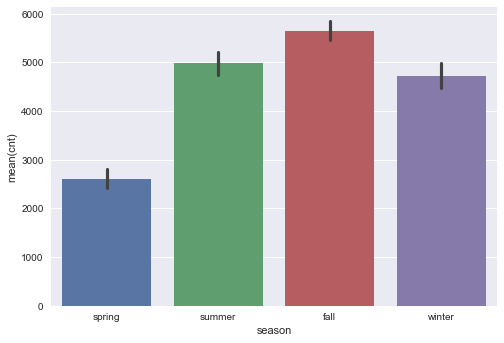

In [268]:
# Analysing the demand in various seasons
sns.barplot(x='season',y='cnt',data=data)


###### Oservation - Fall has maximum count of rides while for spring its lowest

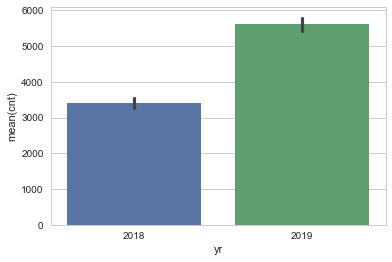

In [269]:
# Analysing the demand in year 2018 and 2019
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='yr',y='cnt',data=data)

###### Oservation - 2019 has more number of rides

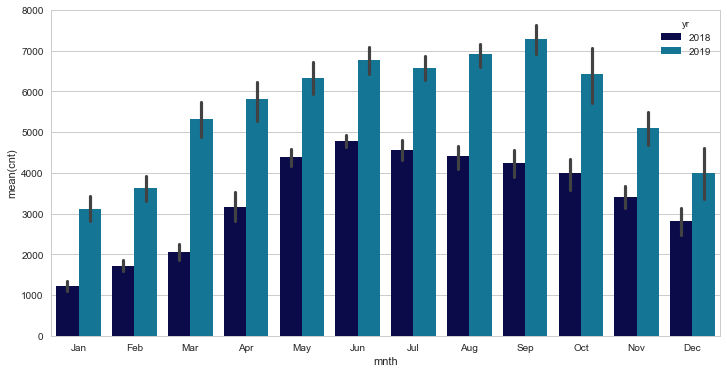

In [270]:
# Analysing the demand in various months
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='mnth',y='cnt',data=data,hue='yr',palette='ocean')

###### Oservation - Maximum rides lies between march to Nov

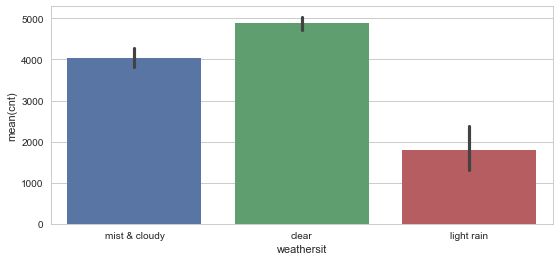

In [271]:
# Analysing the demand in various weathers
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='cnt',data=data)

###### Observation - Clear weather has max count of rides

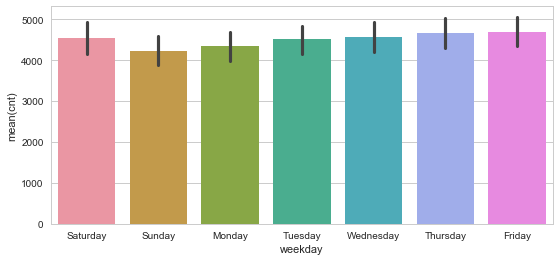

In [272]:
# Analysing the demand in various weekdays
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='cnt',data=data)

###### Observation - There is no specific trend noticed here

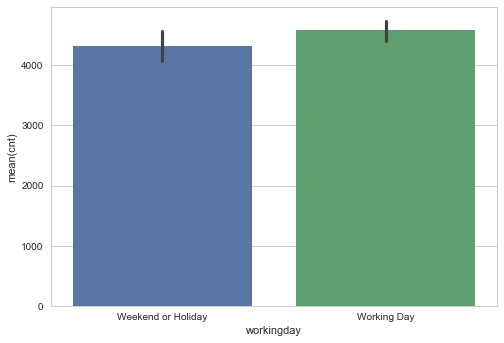

In [273]:
# Analysing the demand based on workingday or not a workingday
sns.set_style('whitegrid')
# plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='cnt',data=data)

###### Observation - more rides on working day as compare to weekend 

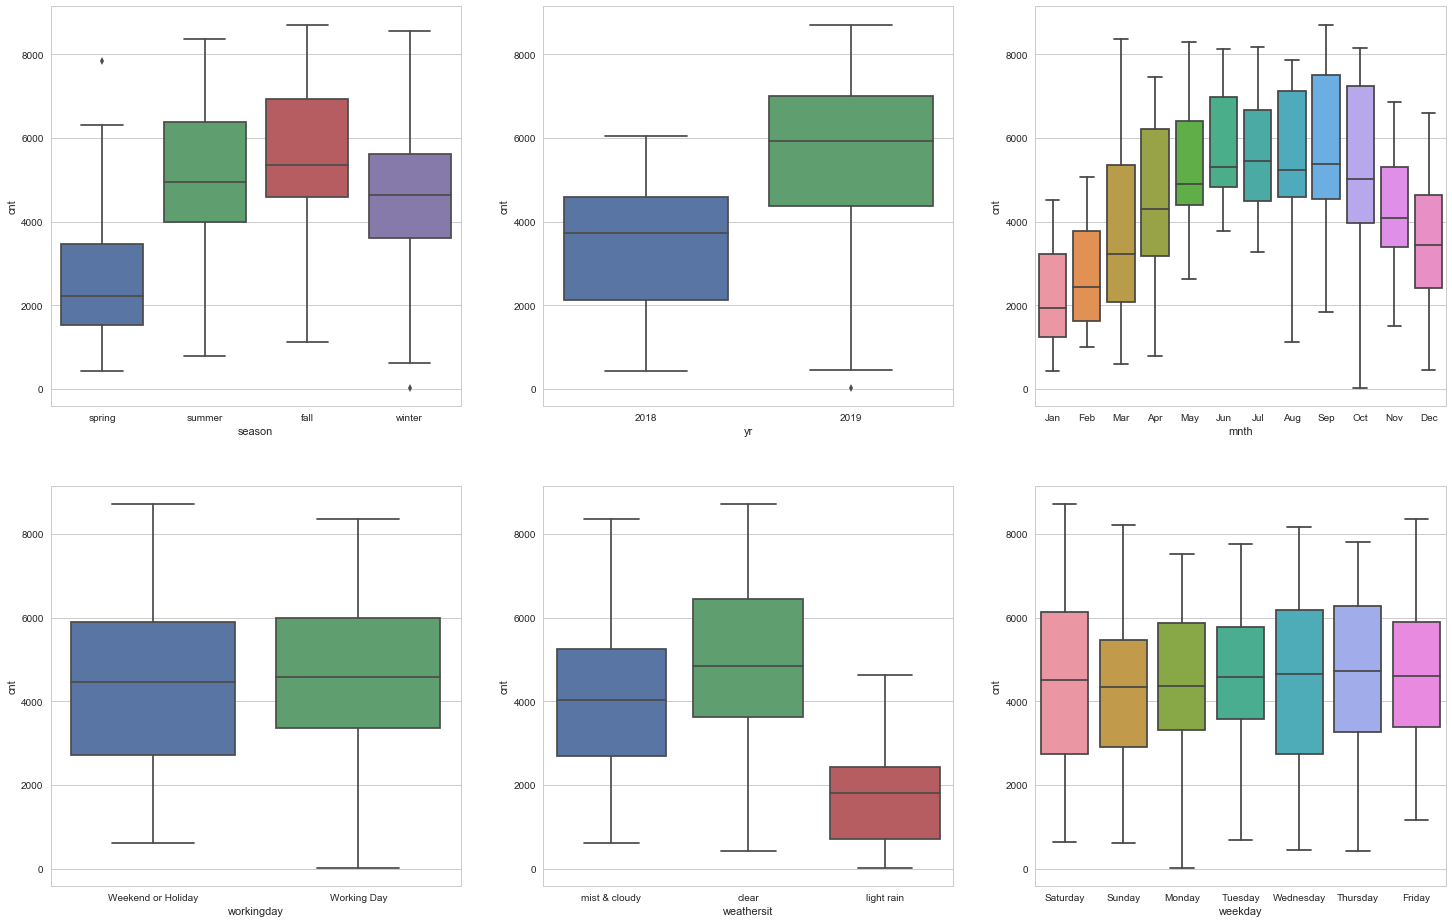

In [274]:

#Visualising categorical Variables to understand data better
plt.figure(figsize=(25, 25))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

###### Observation - There are no specific outliers point in the data other than one few in spring season 

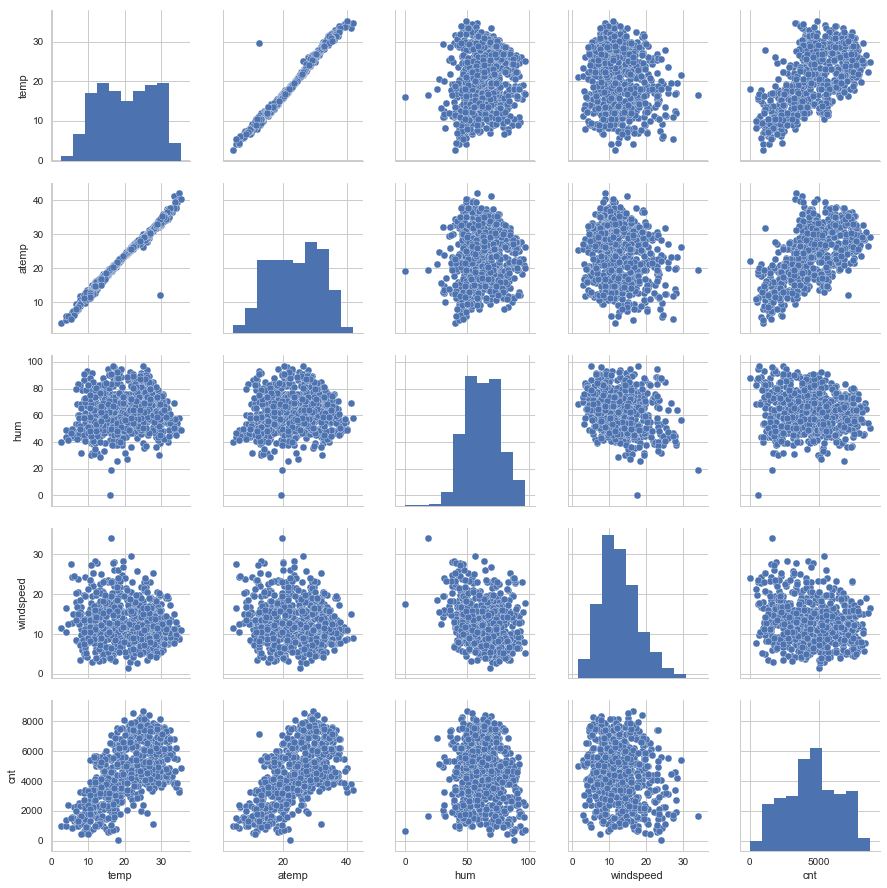

In [275]:
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

###### Observation - Temperature and Atemp are positively corelated with Count so linear relationship exist

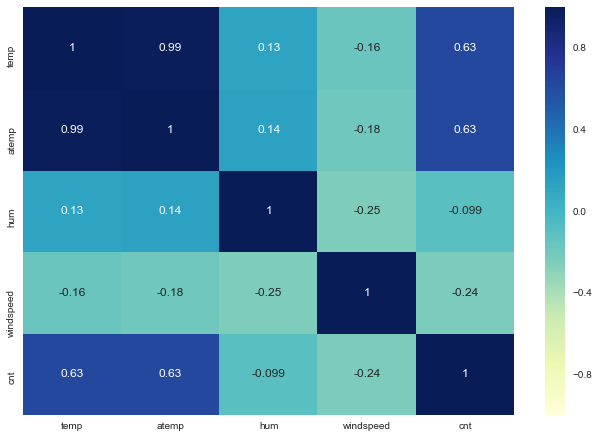

In [276]:
plt.figure(figsize=(11,7.5))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

###### Temp and A temp are highly colinear and corelated so we should drop one of them

In [277]:
# Dropping the variable 'atemp' 
data=data.drop("atemp",axis=1)
data

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Saturday,Weekend or Holiday,mist & cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Sunday,Weekend or Holiday,mist & cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Monday,Working Day,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Tuesday,Working Day,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Wednesday,Working Day,clear,9.305237,43.6957,12.522300,1600
5,spring,2018,Jan,Thursday,Working Day,clear,8.378268,51.8261,6.000868,1606
6,spring,2018,Jan,Friday,Working Day,mist & cloudy,8.057402,49.8696,11.304642,1510
7,spring,2018,Jan,Saturday,Weekend or Holiday,mist & cloudy,6.765000,53.5833,17.875868,959
8,spring,2018,Jan,Sunday,Weekend or Holiday,clear,5.671653,43.4167,24.250650,822
9,spring,2018,Jan,Monday,Working Day,clear,6.184153,48.2917,14.958889,1321


In [278]:
data.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Saturday,Weekend or Holiday,mist & cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Sunday,Weekend or Holiday,mist & cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Monday,Working Day,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Tuesday,Working Day,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Wednesday,Working Day,clear,9.305237,43.6957,12.522300,1600


In [279]:
# Creating the dummy variables for the variables month,season,weathersit,weekday and storing them 
# in new variable 'months',seasons','weather' and 'weekdays' respectively and 
# dropping the first column from these variables using 'drop_first = True'

months= pd.get_dummies(data['mnth'],drop_first=True,prefix='month')

seasons = pd.get_dummies(data['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(data['weathersit'],drop_first=True,prefix='weather')

weekday = pd.get_dummies(data['weekday'],drop_first=True,prefix='day')

year= pd.get_dummies(data['yr'],drop_first=True,prefix='year')

working_day= pd.get_dummies(data['workingday'],drop_first=True,prefix='working_day')

In [280]:
# Add the above created dummy variables to the original bikes dataframe
bikes = pd.concat([data,months,seasons,weather,weekday,year,working_day], axis = 1)

# Looking at the top rows of our dataframe.
bikes.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,weather_light rain,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019,working_day_Working Day
0,spring,2018,Jan,Saturday,Weekend or Holiday,mist & cloudy,14.110847,80.5833,10.749882,985,...,0,1,0,1,0,0,0,0,0,0
1,spring,2018,Jan,Sunday,Weekend or Holiday,mist & cloudy,14.902598,69.6087,16.652113,801,...,0,1,0,0,1,0,0,0,0,0
2,spring,2018,Jan,Monday,Working Day,clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,1
3,spring,2018,Jan,Tuesday,Working Day,clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,1,0,0,1
4,spring,2018,Jan,Wednesday,Working Day,clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,1


In [281]:
# As we have created dummy variables for the categorical variables , now we will drop those categorical variables .

bikes.drop(['season','weathersit','weekday','mnth','yr','workingday'],axis=1,inplace=True)

In [282]:
bikes.head()

,temp,hum,windspeed,cnt,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,weather_light rain,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019,working_day_Working Day
0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [283]:
bikes.shape

(730, 28)

###### Splitting the Data into Training and Testing Sets

In [284]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [285]:
#Looking at the shape of the train dataset.
print("shape of train data is ",bikes_train.shape)
#Looking at the shape of the test dataset.
print("shape of test data is ",bikes_test.shape)


shape of train data is  (510, 28)
shape of test data is  (219, 28)


###### Scaling the Features

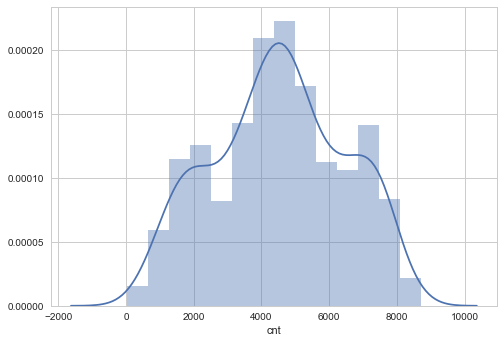

In [286]:
import seaborn as sns, numpy as np
np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(data.cnt)

###### Since data is already normally distributed so we can use min max conversation here for better intereptavility without losing distribution too

In [287]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [288]:
bikes_train.head()

,temp,hum,windspeed,cnt,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,weather_light rain,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019,working_day_Working Day
653,19.201653,55.8333,12.208807,7534,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
576,29.246653,70.4167,11.083475,7216,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
426,16.980847,62.1250,10.792293,4066,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
728,10.489153,48.3333,23.500518,1796,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
482,15.443347,48.9583,8.708325,4220,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [289]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','hum','windspeed','cnt']

bikes_train[num_vars]= scaler.fit_transform(bikes_train[num_vars])

In [290]:
bikes_train.head()

,temp,hum,windspeed,cnt,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,weather_light rain,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019,working_day_Working Day
653,0.509887,0.575354,0.300794,0.864243,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
576,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
426,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
482,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


###### Dividing into X and Y sets for the model building 

In [291]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

### Building a linear model

##### RFE
using Recursive feature elimination to refuce manual efforts and to get to initial start point thereafter will remove manually

In [292]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [293]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 27 columns):
temp                       510 non-null float64
hum                        510 non-null float64
windspeed                  510 non-null float64
month_Aug                  510 non-null uint8
month_Dec                  510 non-null uint8
month_Feb                  510 non-null uint8
month_Jan                  510 non-null uint8
month_Jul                  510 non-null uint8
month_Jun                  510 non-null uint8
month_Mar                  510 non-null uint8
month_May                  510 non-null uint8
month_Nov                  510 non-null uint8
month_Oct                  510 non-null uint8
month_Sep                  510 non-null uint8
season_spring              510 non-null uint8
season_summer              510 non-null uint8
season_winter              510 non-null uint8
weather_light rain         510 non-null uint8
weather_mist & cloudy      510 non-null uint8
day_Monday    

In [294]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(11)
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [295]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 11),
 ('month_Dec', False, 8),
 ('month_Feb', False, 9),
 ('month_Jan', False, 6),
 ('month_Jul', True, 1),
 ('month_Jun', False, 17),
 ('month_Mar', False, 18),
 ('month_May', False, 10),
 ('month_Nov', False, 7),
 ('month_Oct', False, 14),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 4),
 ('weather_light rain', True, 1),
 ('weather_mist & cloudy', True, 1),
 ('day_Monday', False, 12),
 ('day_Saturday', True, 1),
 ('day_Sunday', False, 3),
 ('day_Thursday', False, 15),
 ('day_Tuesday', False, 13),
 ('day_Wednesday', False, 16),
 ('year_2019', True, 1),
 ('working_day_Working Day', False, 2)]

In [296]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'month_Jul', 'month_Sep', 'season_spring',
       'weather_light rain', 'weather_mist & cloudy', 'day_Saturday',
       'year_2019'],
      dtype='object')

In [297]:
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'season_summer',
       'season_winter', 'day_Monday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'working_day_Working Day'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [298]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [299]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [300]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [301]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          4.33e-184
Time:                        23:12:08   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

###### In the above model , according to the pvalues , day_Saturday is not significant before going ahead with removal of columns lets see VIF too

In [302]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.24
1,temp,2.08
2,hum,1.82
6,season_spring,1.64
8,weather_mist & cloudy,1.53
4,month_Jul,1.29
7,weather_light rain,1.24
3,windspeed,1.17
5,month_Sep,1.10
10,year_2019,1.03


In [303]:
# Dropping the const variable
X_train_new = X_train_rfe.drop(["day_Saturday"], axis = 1)

In [304]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm2 = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.39e-184
Time:                        23:12:08   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3823      0.030     12.642      0.000       0.323       0.442
temp                      0.4079      0.027     15.336      0.000       0.356       0.460
hum                      -0.1281      0.039     -3.326      0.001      -0.204      -0.052
windspeed                -0.1789      0.027     -6.742      0.000      -0.231      -0.127
month_Jul                -0.0789      0.018     -4.426      0.000      -0.114      -0.044
month_Sep                 0.0556      0.016      3.454      0.001       0.024       0.087
season_spring            -0.1485      0.012    -11.934      0.000      -0.173      -0.124
weather_light rain       -0.2386      0.027     -8.702      0.000      -0.292      -0.185
weather_mist & cloudy    -0.0600      0.011     -5.534      0.000      -0.081      -0.039
year_2019                 0.2327      0.008     27.541      0.000       0.216       0.249
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.640
Skew:                          -0.557   Prob(JB):                     3.17e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.70
1,temp,2.08
2,hum,1.81
6,season_spring,1.64
8,weather_mist & cloudy,1.53
4,month_Jul,1.29
7,weather_light rain,1.24
3,windspeed,1.17
5,month_Sep,1.10
9,year_2019,1.03


In [306]:
# Dropping the const variable
X_train_new = X_train_new.drop(["const"], axis = 1)

In [307]:
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm2 = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.39e-184
Time:                        23:12:09   Log-Likelihood:                 486.89
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3823      0.030     12.642      0.000       0.323       0.442
temp                      0.4079      0.027     15.336      0.000       0.356       0.460
hum                      -0.1281      0.039     -3.326      0.001      -0.204      -0.052
windspeed                -0.1789      0.027     -6.742      0.000      -0.231      -0.127
month_Jul                -0.0789      0.018     -4.426      0.000      -0.114      -0.044
month_Sep                 0.0556      0.016      3.454      0.001       0.024       0.087
season_spring            -0.1485      0.012    -11.934      0.000      -0.173      -0.124
weather_light rain       -0.2386      0.027     -8.702      0.000      -0.292      -0.185
weather_mist & cloudy    -0.0600      0.011     -5.534      0.000      -0.081      -0.039
year_2019                 0.2327      0.008     27.541      0.000       0.216       0.249
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.640
Skew:                          -0.557   Prob(JB):                     3.17e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.88
0,temp,11.88
2,windspeed,3.94
7,weather_mist & cloudy,2.10
8,year_2019,2.03
5,season_spring,1.84
3,month_Jul,1.40
4,month_Sep,1.20
6,weather_light rain,1.20


In [309]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["hum"], axis = 1)
#X_train_new = X_train_new.drop(["day_Sunday"], axis = 1)
#day_Sunday

In [310]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm3 = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.84e-183
Time:                        23:12:09   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3038      0.019     15.890      0.000       0.266       0.341
temp                      0.3937      0.027     14.849      0.000       0.342       0.446
windspeed                -0.1525      0.026     -5.962      0.000      -0.203      -0.102
month_Jul                -0.0727      0.018     -4.058      0.000      -0.108      -0.037
month_Sep                 0.0531      0.016      3.268      0.001       0.021       0.085
season_spring            -0.1460      0.013    -11.638      0.000      -0.171      -0.121
weather_light rain       -0.2748      0.025    -10.818      0.000      -0.325      -0.225
weather_mist & cloudy    -0.0804      0.009     -8.896      0.000      -0.098      -0.063
year_2019                 0.2356      0.008     27.744      0.000       0.219       0.252
==============================================================================
Omnibus:                       56.658   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.747
Skew:                          -0.593   Prob(JB):                     1.49e-29
Kurtosis:                       5.200   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.60
1,windspeed,3.81
7,year_2019,2.03
4,season_spring,1.52
6,weather_mist & cloudy,1.48
2,month_Jul,1.33
3,month_Sep,1.20
5,weather_light rain,1.06


In [312]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["temp"], axis = 1)
#X_train_new = X_train_new.drop(["day_Sunday"], axis = 1)
#day_Sunday

In [313]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm4 = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          4.32e-145
Time:                        23:12:09   Log-Likelihood:                 388.31
No. Observations:                 510   AIC:                            -760.6
Df Residuals:                     502   BIC:                            -726.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5343      0.013     39.917      0.000       0.508       0.561
windspeed                -0.1755      0.031     -5.734      0.000      -0.236      -0.115
month_Jul                 0.0375      0.020      1.919      0.056      -0.001       0.076
month_Sep                 0.1013      0.019      5.315      0.000       0.064       0.139
season_spring            -0.2534      0.012    -20.618      0.000      -0.278      -0.229
weather_light rain       -0.3069      0.030    -10.114      0.000      -0.367      -0.247
weather_mist & cloudy    -0.0915      0.011     -8.477      0.000      -0.113      -0.070
year_2019                 0.2494      0.010     24.644      0.000       0.229       0.269
==============================================================================
Omnibus:                       41.874   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.129
Skew:                          -0.473   Prob(JB):                     7.30e-20
Kurtosis:                       4.803   Cond. No.                         8.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### From the coefficients that we get for the variables, our linear regression equation becomes:

Count = 0.53  - 0.1755 X windspeed - 0.0375 X month_Jul +0.0103 X month_Sep- 0.2534 X season_spring - 0.30 X weather_light rain -0.091 X weather_mist & cloudy + 0.2494 X year_2019

In [314]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.37
6,year_2019,1.73
5,weather_mist & cloudy,1.41
3,season_spring,1.40
2,month_Sep,1.09
1,month_Jul,1.08
4,weather_light rain,1.06


###### R squared- 0.746 ( Variance explained by 7 valirables is 74.7 %) F Statistic is also high so model is significant

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [315]:
y_train_price = lm4.predict(X_train_lm)

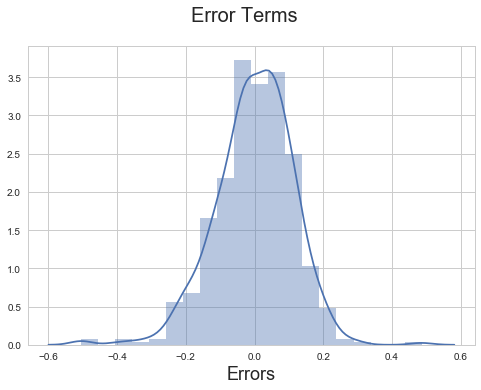

In [316]:
# Plot the histogram of the error terms
fig = plt.figure()

sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###### Observation - It satisfies the condition that error should be normally distributed 

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [317]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'hum','cnt']

bikes_test[vars] = scaler.transform(bikes_test[vars])


In [318]:
bikes_test.head()


,temp,hum,windspeed,cnt,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,weather_light rain,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019,working_day_Working Day
184,0.307016,1.955914,0.092231,0.692706,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
535,0.330605,1.808848,0.158068,0.712034,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
299,0.198574,2.517430,0.329011,0.303382,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0.323916,1.270063,0.334091,0.547400,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0.302087,0.887696,0.521483,0.569029,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [319]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [320]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [321]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
const                    219 non-null float64
windspeed                219 non-null float64
month_Jul                219 non-null uint8
month_Sep                219 non-null uint8
season_spring            219 non-null uint8
weather_light rain       219 non-null uint8
weather_mist & cloudy    219 non-null uint8
year_2019                219 non-null uint8
dtypes: float64(2), uint8(6)
memory usage: 6.4 KB


In [322]:
# Making predictions
y_pred = lm4.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

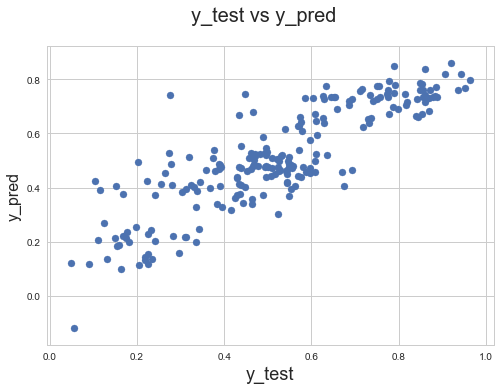

In [323]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 


In [310]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.73190195397200619

###### R square value or Train is - 75% while for test is 73 % which seems okay 

###### so we found windspeed , month_July and Sep Month, season_spring , weather_light rain and weather_mist & cloudy are the variable that will be of most signicant for the business and they are deciding factors in predicting count of rides

In [329]:
residuals = y_test-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.010732186589471657


###### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero and here it is close to 0 so we have verified the same

###### Check for Homoscedasticity:


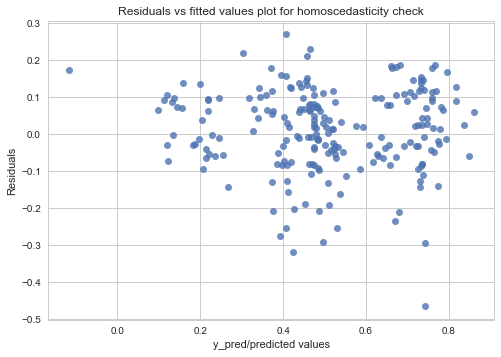

In [336]:
p = sns.regplot(y_pred,residuals,  fit_reg=False)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

###### We can see here that there is distributing of similar pattern around the 0 line so it fulfill the assumption for homsocedasity

######  No autocorrelation of residuals¶:

###### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.¶
Null Hypothesis: Autocorrelation is absent.
Alternative Hypothesis: Autocorrelation is present.

In [338]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.038537462994805094

###### Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated. There seems some corelation between the error term so with time may see trend of seasonality here , so time series could function better here since there is season and time involved